# 18.06 pset 6 Solutions

## Problem 1 (10 pts)

As in our derivation of $A^TAx=A^Tb$ from minimizing $\Vert b - Ax\Vert$, it is often useful to do calculus (derivatives and integrals) on vectors and matrices.  If you have a matrix $A$ that is a function $A(\alpha)$ of some parameter $\alpha$, then its derivative $dA/d\alpha$ is just  $$\frac{dA}{d\alpha} = \lim_{h\to0}\frac{A(\alpha+h)-A(\alpha)}{h} = \begin{pmatrix} \frac{da_{1,1}}{d\alpha} & \frac{da_{1,2}}{d\alpha} & \cdots \\ \frac{da_{2,1}}{d\alpha} & \frac{da_{2,2}}{d\alpha} & \cdots \\ \vdots & \vdots & \ddots \end{pmatrix},$$ the matrix of the ordinary derivatives of each entry $a_{i,j}$ of $A$.  Lots of rules immediately follow, e.g. it should be obvious that $\frac{d(A^T)}{d\alpha} = \left(\frac{dA}{d\alpha}\right)^T$.

* If $C = AB$ ($A$ is $m \times n$ and $B$ is $n \times p$), then each entry $c_{i,j}$ of $C$ is $c_{i,j} = \sum_{k=1}^n a_{i,k} b_{k,j}$ (see lecture 2, perspective 1).   From this, apply the usual 18.01 product rule etc. to find the product rule $\frac{dC}{d\alpha} = ???$ for matrices (where the entries of both A and B are functions of α).

* Suppose the invertible square matrix $A$ has entries that are a function of $\alpha$.  If $x$ is the solution to $Ax=b$ (where b is a constant vector, independent of α), then
  - Give a formula for $\frac{dx}{d\alpha}$.  (Hint: take the derivative of both sides of Ax=b using your product rule and then solve for dx/dα.)
  - Give a formula for $\frac{d(A^{-1})}{d\alpha}$.   (Hint: you get the columns of $A^{-1}$ by solving for $x$ with $b = e_1, e_2, \ldots$.)

### Solution

* We have $$\boxed{\frac{dC}{d\alpha} = \frac{dA}{d\alpha}B + A\frac{dB}{d\alpha}}.$$  To see why, just take the derivative of the $i,j$-entry $c_{ij}$ of $C = AB$ and see what happens: $$\frac{dc_{ij}}{d\alpha} = \frac{d}{d\alpha}\sum_{k = 1}^n a_{ik}b_{kj} = \sum_{k = 1}^n \frac{da_{ik}}{d\alpha}b_{kj} + \sum_{k = 1}^n a_{ik}\frac{db_{kj}}{d\alpha},$$ and the right-hand side above is exactly the $i,j$-entry of $\frac{dA}{d\alpha}B + A\frac{dB}{d\alpha}.$  So, $\frac{dC}{d\alpha}$ and $\frac{dA}{d\alpha}B + A\frac{dB}{d\alpha}$ have the same entries, which is exactly what it means for two matrices to be equal.

* There are a few ways to do this.

 - If $Ax = b$, then taking derivatives of both sides via the product rule gives $\frac{dA}{d\alpha} x + A \frac{dx}{d\alpha} = 0$, or $\boxed{\frac{dx}{d\alpha} = -A^{-1} \frac{dA}{d\alpha} x = -A^{-1} \frac{dA}{d\alpha} A^{-1}b}$.  That immediately gives $\boxed{ \frac{d(A^{-1})}{d\alpha}  = -A^{-1} \frac{dA}{d\alpha} A^{-1}}$, by comparison with $\frac{dx}{d\alpha} = \frac{d(A^{-1})}{d\alpha} b$ (which you get from differentiating $x = A^{-1} b$ … you could then plug in $b = e_1, e_2, \ldots$, if you want, to explicitly get the columns of $\frac{d(A^{-1})}{d\alpha}$).

 - Another way is to find $\frac{d(A^{-1})}{d\alpha}$ first.  The matrix $A^{-1}$, by definition, is the matrix satisfying $A^{-1}A = I$.  Taking derivatives of both sides and using the product rule, we get $$\frac{d(A^{-1})}{d\alpha}A + A^{-1}\frac{dA}{d\alpha} = 0.$$  Solving for the desired quantity $\frac{d(A^{-1})}{d\alpha}$, we get $$\boxed{\frac{d(A^{-1})}{d\alpha} = -A^{-1}\frac{dA}{d\alpha}A^{-1}}.$$  So, if $Ax = b$ for $b$ constant, then we have $x = A^{-1}b$ and therefore $$\boxed{\frac{dx}{d\alpha} = \frac{d(A^{-1})}{d\alpha}b = -A^{-1}\frac{dA}{d\alpha}A^{-1}b}.$$

*Remark*: Compare this with the ordinary [chain rule](https://en.wikipedia.org/wiki/Chain_rule) for scalar functions $a(\alpha)$: $\frac{d (a^{-1})}{d\alpha} = -a^{-2} \frac{da}{d\alpha}$.  If we rewrite this as $\frac{d (a^{-1})}{d\alpha} = - a^{-1} \frac{da}{d\alpha} a^{-1}$, it looks like our matrix expression above!  With matrices, however, **you can't rearrange the order**, so you have to be a bit more careful in applying the chain rule.

## Problem 2 (10 points)

Suppose that we have a series of $n$ data points $(a_i, b_i)$ that we want to fit to a function of the form:

$$
b(a) = c \sin(\omega a + \phi)
$$

for an unknown amplitude $c$ and an unknown phase angle $\phi$, but a *given* frequency $\omega$.  We want to find the *least-square* $c$ and $\phi \in [-\pi, \pi)$, i.e. the ones that minimize $\sum_i [b_i - b(a_i)]^2$ as in class.

* As written above, $b(a)$ is a nonlinear function of $\phi$.  Using the angle-addition identity for sine (google it), rewrite this as a *linear* function of two *new* unknown parameters $x_1,x_2$ so that $$\begin{pmatrix} b(a_1) \\ b(a_2) \\ \vdots \\ b(a_n) \end{pmatrix} = Ax$$ for some $n\times 2$ matrix $A$.
  - Give the matrix $A$ explicitly.
  - Give a formula for $c$ and $\phi$ in terms of $x_1$ and $x_2$.   (You may find the [atan2 function](https://en.wikipedia.org/wiki/Atan2) helpful.)
  
* The following code gives 100 data points $(a_i, b_i)$ for a frequency $\omega = 2\pi$.  Modify the code (fill in the `????`) to compute the best-fit $c$ and $\phi$ and plot the resulting best-fit curve.

You should turn in what code you wrote for `????` and what $c$ and $\phi$ you got.  You don't need to turn in your plot — but if your curve doesn't roughly go through the data points, you are doing something wrong!

### Solution

* Using the angle-addition formula for sine, we get $$b(a) = c \sin(\omega a + \phi) = c\sin(\omega a)\cos(\phi) + c\cos(\omega a)\sin(\phi).$$  In our setting, $\sin(\omega a)$ and $\cos(\omega a)$ are known fixed quantities from the data, and what's unknown is the factor $c\cos(\phi)$ in the first term and $c\sin(\phi)$ in the second term.  So introducing the parameters $x_1 = c\cos(\phi)$ and $x_2 = c\sin(\phi)$, we can rewrite the equation above as $$b(a) = \sin(\omega a)x_1 + \cos(\omega a)x_2.$$ If we have $n$ data points, our model should be producing $n$ predictions $b(a_1), ..., b(a_n)$ from the $n$ data points $a_1, ..., a_n$, of the form $$b(a_i) = \sin(\omega a_i)x_1 + \cos(\omega a_i)x_2.$$  To write this in the desired matrix form $$\begin{pmatrix} b(a_1) \\ b(a_2) \\ \vdots \\ b(a_n) \end{pmatrix} = Ax,$$ where $x = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}$, we then need to take the $n \times 2$ matrix $$\boxed{A = \begin{pmatrix} \sin(\omega a_1) & \cos(\omega a_1) \\ \sin(\omega a_2) & \cos(\omega a_2) \\ \vdots & \vdots \\ \sin(\omega a_n) & \cos(\omega a_n)\end{pmatrix}}.$$  To write $c, \phi$ in terms of $x_1, x_2$ we take the defining equations $$x_1 = c\cos(\phi)$$ $$x_2 = c\sin(\phi)$$ and solve for $c, \phi$.  Squaring each equation, adding, and taking the square root, we get $$\boxed{c = \sqrt{x_1^2 + x_2^2} = \Vert x \Vert}.$$  By the definition of the $\text{atan}2$ function, we get $$\boxed{\phi = \text{atan}2(x_2, x_1)}.$$

We now modify and run the given code to compute the best fit ($c$ and $\phi$ are displayed after the graph):

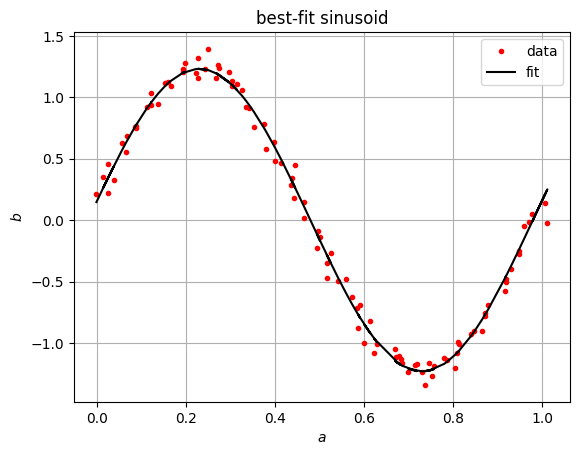

c = 1.2322263463670216
ϕ = 0.13282168385361381


In [8]:
a = [-0.0020571, 0.0234368, 0.0131772, 0.0364537, 0.02458, 0.0553003, 0.0649847, 0.0667423, 0.0835347, 0.0873754, 0.0860518, 0.110606, 0.120988, 0.120872, 0.136634, 0.150958, 0.15873, 0.164522, 0.191929, 0.197508, 0.192026, 0.22178, 0.226886, 0.242289, 0.227212, 0.249128, 0.270098, 0.273125, 0.29594, 0.267332, 0.302427, 0.313911, 0.303093, 0.324527, 0.333408, 0.341294, 0.351236, 0.375601, 0.37823, 0.39675, 0.399365, 0.413612, 0.444659, 0.435332, 0.437833, 0.441308, 0.464099, 0.465531, 0.495956, 0.500535, 0.493443, 0.524714, 0.515599, 0.51726, 0.541133, 0.558809, 0.571957, 0.583461, 0.590294, 0.586423, 0.613441, 0.5995, 0.628169, 0.622209, 0.677795, 0.669183, 0.681861, 0.670965, 0.685153, 0.718431, 0.712982, 0.698772, 0.730441, 0.751577, 0.736971, 0.756728, 0.745847, 0.779236, 0.784867, 0.804464, 0.811565, 0.809182, 0.811859, 0.840568, 0.847529, 0.865416, 0.871873, 0.871151, 0.877924, 0.915995, 0.918345, 0.917561, 0.929699, 0.947075, 0.948119, 0.957958, 0.969449, 1.01146, 0.977625, 1.00604]
b = [0.21573, 0.221734, 0.349714, 0.329997, 0.460348, 0.624731, 0.556417, 0.684642, 0.762612, 0.754299, 0.766803, 0.917739, 0.93527, 1.03527, 0.948106, 1.11401, 1.12471, 1.08913, 1.20989, 1.27851, 1.23481, 1.20229, 1.32088, 1.23435, 1.1618, 1.39465, 1.26524, 1.23932, 1.20349, 1.15636, 1.09365, 1.10775, 1.1303, 1.06158, 0.9227, 0.912458, 0.759356, 0.785229, 0.581536, 0.633751, 0.480104, 0.468525, 0.446304, 0.288345, 0.346544, 0.179543, 0.143928, 0.0189101, -0.0855253, -0.133835, -0.225411, -0.269586, -0.347995, -0.467696, -0.497237, -0.47675, -0.628402, -0.719642, -0.689271, -0.878614, -0.82304, -0.999039, -1.00726, -1.08171, -1.10438, -1.04714, -1.13234, -1.11837, -1.16706, -1.17111, -1.18153, -1.24074, -1.23679, -1.26892, -1.34217, -1.19197, -1.16301, -1.12142, -1.14242, -1.20055, -0.991114, -1.0782, -1.00512, -0.930438, -0.906866, -0.900119, -0.757967, -0.78452, -0.694501, -0.578888, -0.476328, -0.502321, -0.395007, -0.276761, -0.248281, -0.045326, -0.0160062, -0.019926, 0.0510702, 0.136694]

A = [sin.(2π*a) cos.(2π*a)] # there's the ???? and ????

x̂ = A \ b  # solve for the least-square solution x̂

c = norm(x̂) # there's the ???
# alternatively, c = sqrt(x̂[1]^2 + x̂[2]^2)
# alternatively, c = hypot(x̂[1], x̂[2])

ϕ = atan2(x̂[2], x̂[1]) # there's another ???

using PyPlot
plot(a, b, "r.")
â = linspace(0,1,300)
plot(a, c * sin.(2π*a + ϕ), "k-")
xlabel(L"a")
ylabel(L"b")
title("best-fit sinusoid")
legend(["data", "fit"])
grid()

println("c = ", c)
println("ϕ = ", ϕ)

(As it turns out, the data points were actually generated from c=1.234 and ϕ=0.1234 and then adding random noise, so the fit is recovering these values reasonably well.)

## Problem 3 (10 points)

From Strang, section 4.3, problem 27 (distance between lines):

The points $P = \begin{pmatrix}x \\ x \\x \end{pmatrix}$ and $Q = \begin{pmatrix}y\\ 3y\\ -1\end{pmatrix}$ are on two lines in space that don't meet.

* Choose $x$ and $y$ to minimize the squared distance $\Vert P - Q\Vert^2$.

  - Express this problem in matrix form as minimizing $$\Vert A\vec{x} - \vec{b}\Vert^2$$ for $\vec{x}=\begin{pmatrix}x\\y\end{pmatrix}$, some matrix $A$, and some vector $\vec{b}$.
  - Solve the normal equations $A^T A \hat{x} = A^T \vec{b}$ to find the minimizer $\hat{x}$.

* The line connecting the closest $P$ and $Q$ is perpendicular to `__________`.


### Solution



* We have $P = x \begin{pmatrix}1 \\ 1 \\1 \end{pmatrix}$ and $Q = y\begin{pmatrix}1\\ 3\\ 0\end{pmatrix} + \begin{pmatrix}0\\ 0\\ -1\end{pmatrix}$, so the vector difference is $$P - Q = x\begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix} - y\begin{pmatrix} 1 \\ 3 \\ 0 \end{pmatrix} + \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 & -1 \\ 1 & -3 \\ 1 & 0 \end{pmatrix}\begin{pmatrix} x \\ y\end{pmatrix} + \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix} = A\vec{x} - \vec{b}$$ where $$A = \begin{pmatrix} 1 & -1 \\ 1 & -3 \\ 1 & 0 \end{pmatrix}, \ \  b = \begin{pmatrix} 0 \\ 0 \\ -1 \end{pmatrix}.$$  So, finding $x, y$ minimizing the length of the vector $P - Q$ is the same as solving this least squares problem of minimizing $\Vert A\vec{x} - \vec{b}\Vert^2$ over $\vec{x}=\begin{pmatrix}x\\y\end{pmatrix}$.  The normal equations are $A^TA\vec{x} = A^T\vec{b}$.  Plugging in $A$ and $\vec{b}$ as above, this is the matrix equation $$\begin{pmatrix} 3 & -4 \\ -4 & 10\end{pmatrix}\begin{pmatrix} x \\ y\end{pmatrix} = \begin{pmatrix} -1 \\ 0\end{pmatrix}$$ which has solution $(x, y) = (-5/7, -2/7)$.

* The line connecting the closest $P$ and $Q$ is perpendicular to **the column space** $C(A)$, which means that it is perpendicular to **both lines**.

Let's double-check the answer in Julia:

In [1]:
[ 1 -1; 1 -3; 1 0 ] \ [0,0,-1]

2-element Array{Float64,1}:
 -0.714286
 -0.285714

Yup, this matches our answer from above:

In [2]:
[-5/7, -2/7]

2-element Array{Float64,1}:
 -0.714286
 -0.285714

## Problem 4 (10 points)

From Strang, section 4.2, questions 11–12:

* Project $b$ onto $C(A)$ by solving $A^T A \hat{x} = A^T b$ to obtain the projection $p = A\hat{x}$ for $A = \begin{pmatrix} 1 & 1 \\ 0 & 1 \\ 0 & 0 \end{pmatrix}$ and $b = \begin{pmatrix} 2 \\ 3 \\ 4 \end{pmatrix}$.

* Find $e = b - p$, and verify that it is perpendicular to the columns of $A$.

* Compute the projection matrix $P$ onto $C(A)$, verify that $Pb$ gives the same $p$, and verify that $P^2 = P$.

### Solution

For a sanity check throughout, notice that $C(A)$ is just the $xy$-plane in $\mathbb{R}^3$.  So the projection to $C(A)$ should just zero out the third coordinate.

* Plugging in the matrix $A$ and the vector $b$, we need to solve the equation $$\begin{pmatrix} 1 & 1 \\ 1 & 2\end{pmatrix}\begin{pmatrix} x \\ y\end{pmatrix} = \begin{pmatrix} 2 \\ 5\end{pmatrix}$$  The solution is $x = -1, y = 3$.  So the projection is $$p = A\hat{x} = \begin{pmatrix} 1 & 1 \\ 0 & 1 \\ 0 & 0 \end{pmatrix}\begin{pmatrix} -1 \\ 3\end{pmatrix} = \begin{pmatrix} 2 \\ 3 \\ 0\end{pmatrix}$$

* We have $$e = b - p = \begin{pmatrix} 2 \\ 3 \\ 4 \end{pmatrix}  - \begin{pmatrix} 2 \\ 3 \\ 0\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 4\end{pmatrix}$$ which is indeed perpendicular to the columns of $A$.

* We can do this the hard way or the easy way.

  - Easy way: By inspection of $A$, since $C(A)$ is just the $xy$-plane, $P$ is just the projection to the $xy$-plane.  So we have that $$P\begin{pmatrix}x \\ y \\ z\end{pmatrix} = \begin{pmatrix}x \\ y \\ 0\end{pmatrix}$$ for *any* $x, y, z$.  So, taking each of them to be 1 while setting the others equal to zero, we can read off the columns of $P$, obtaining: $$P = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{pmatrix}.$$  It definitely satisfies $P^2 = P$, and we also have that $$Pb = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{pmatrix}\begin{pmatrix} 2 \\ 3 \\ 4 \end{pmatrix} = \begin{pmatrix} 2 \\ 3 \\ 0 \end{pmatrix} = p$$ as needed.
  
  - Hard way: In general, the projection will be given by $P = A(A^TA)^{-1}A^T$.  Let's compute this piece by piece:  $$A^TA = \begin{pmatrix} 1 & 1 \\ 1 & 2 \end{pmatrix},$$ and if we look up the formula for the inverse of a 2×2 matrix we find: $$(A^TA)^{-1} = \begin{pmatrix} 1 & 1 \\ 1 & 2 \end{pmatrix}^{-1} = \frac{1}{1\cdot2 - 1\cdot1} \begin{pmatrix} 2 & -1 \\ -1 & 1 \end{pmatrix},$$ and so the projector is $$P = A(A^TA)^{-1}A^T = \begin{pmatrix} 1 & 1 \\ 0 & 1 \\ 0 & 0 \end{pmatrix} \begin{pmatrix} 2 & -1 \\ -1 & 1 \end{pmatrix} \begin{pmatrix} 1 & 0 & 0 \\ 1 & 1 & 0 \end{pmatrix} = \\ \begin{pmatrix} 1 & 1 \\ 0 & 1 \\ 0 & 0 \end{pmatrix} \begin{pmatrix} 1 & -1 & 0 \\ 0 & 1 & 0 \end{pmatrix}  = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{pmatrix}.$$ Whew, a lot of arithmetic!

## Problem 5 (5 points)

From Strang, section 4.2, question 24.

$N(A^T)$ is `______` to $C(A)$.  So if $A^T b = 0$, the projection of $b$ onto $C(A)$ should be $p = $ `______`.  Check that $P = A(A^T A)^{-1} A^T$ gives this answer.

### Solution

$N(A^T)$ is **orthogonal** to $C(A)$.  So if $A^T b = 0$, the projection of $b$ onto $C(A)$ should be $\boxed{p = 0}$.  To see that this indeed happens using the formula for the projection matrix, we get $$Pb = A(A^TA)^{-1}A^Tb = A(A^TA)^{-1}0 = 0.$$

## Problem 6 (10 points)

From Strang, section 4.2, problem 30.

* Find the projection matrix $P_C$ onto the column space $C(A)$ (after looking closely at the matrix!) for $A = \begin{pmatrix} 3 & 6 & 6 \\ 4 & 8 & 8 \end{pmatrix}$.

* Find the 3 by 3 projection matrix $P_R$ onto the row space of $A$.  Multiply $B = P_C A P_R$.  Your answer $B$ may be a little surprising at first — can you explain it?

### Solution

* Looking closely at the matrix, we can see that the column space is just the span of $a = \begin{pmatrix} 3 \\ 4 \end{pmatrix}.$   From class, the projector onto a 1d subspace is just $P = \frac{a a^T}{a^T a}$, so we have $$P_C = \frac{a a^T}{a^T a} = \frac{1}{25} =\begin{pmatrix} 3 \\ 4 \end{pmatrix}\begin{pmatrix} 3 & 4 \end{pmatrix} = \boxed{\frac{1}{25} \begin{pmatrix} 9 & 12 \\ 12 & 16\end{pmatrix}}.$$

* If the $C(A)$ is one-dimensional, then $C(A^T)$ must also be one dimensional and we can again use the formula for a 1d projector to simplify our life.  The row space is spanned by 1/3 the first row $r = \begin{pmatrix} 1 \\ 2 \\ 2 \end{pmatrix}$ (dividing by 3 simplifies our calculations!), so again we just calculate: $$P_R = \frac{r r^T}{r^T r} = \frac{1}{9} \begin{pmatrix} 1 \\ 2 \\ 2 \end{pmatrix}\begin{pmatrix} 1 & 2 & 2 \end{pmatrix} = \boxed{\frac{1}{9} \begin{pmatrix} 1 & 2 & 2 \\ 2 & 4 & 4 \\ 2 & 4 & 4 \end{pmatrix}}.$$

* Multiplying out $B = P_CAP_R$, we get $$B = P_CAP_R = \begin{pmatrix} 9/25 & 12/25 \\ 12/25 & 16/25\end{pmatrix}\begin{pmatrix} 3 & 6 & 6 \\ 4 & 8 & 8 \end{pmatrix}\begin{pmatrix} 1/9 & 2/9 & 2/9 \\ 2/9 & 4/9 & 4/9 \\ 2/9 & 4/9 & 4/9\end{pmatrix} = \begin{pmatrix} 3 & 6 & 6 \\ 4 & 8 & 8 \end{pmatrix}.$$  That's just the matrix $\boxed{A}$!  Why does this happen?  Even better than $P_CAP_R = A$, we have *both* that $P_CA = A$ and $AP_R = A$ (and then $P_CAP_R = A$ follows from these two).

  - Why is $P_CA = A$?  Well, two matrices $M, N$ of the same size are equal if and only if $Mx = Nx$ for all possible column vectors $x$ so that the multiplication makes sense.  So to see that $P_CA = A$, we only need to see that $P_CAx = Ax$ for any vector $x$; but $Ax$ is in the column space $C(A)$, so it's projection $P_CAx$ is itself, i.e. $P_CAx = Ax$.  So $P_CA = A$.
  
  - Similarly, to check that $AP_R = A$ we can just check that $AP_Rx = P_Rx$ for all possible $x$.  Any $x$ in $\mathbb{R}^n$ (let's say that $A$ is $m \times n$ can be written in the form $x = x_n + x_r$ with $x_n$ in the nullspace and $x_r$ in the row space of $A$ (because these spaces are orthogonal complements).  So it's enough to check that $AP_Rx_r = Ax_r$ and $AP_rx_n = Ax_n$.  In the first case, we have $P_Rx_r = x_r$ by definition of projection, so indeed $AP_Rx_r = Ax_r$.  In the second case, we have $P_Rx_n = 0$ because $N(A)$ and $C(A^T)$ are orthogonal; as $Ax_n = 0$ as well by the definition of nullspace, we have $AP_Rx_n = Ax_n (= 0)$.  So $AP_Rx = Ax$ for all $x$, so $AP_R = A$.